# Link prediction for NetworKit

In [1]:
from networkit import *
%matplotlib inline
import matplotlib.pyplot as plt

No module named 'seaborn'


In [2]:
cd ~/Thesis/NetworKit-Esders

/home/xza/Thesis/NetworKit-Esders


In [3]:
G = readGraph("input/jazz.graph", Format.METIS)

In [4]:
partitionedGraph = linkprediction.RandomEdgePartitioner(G).partitionByPercentage(0.1)
G.numberOfEdges()

2742

In [5]:
partitionedGraph[0].numberOfEdges()

2468

In [6]:
partitionedGraph[1].numberOfEdges()

274

In [7]:
katzIndex = linkprediction.KatzIndex(partitionedGraph[0], 20, 0.005)
commonNeighborsIndex = linkprediction.CommonNeighborsIndex(partitionedGraph[0])
jaccardIndex = linkprediction.JaccardIndex(partitionedGraph[0])
preferentialAttachmentIndex = linkprediction.PreferentialAttachmentIndex(partitionedGraph[0])
adamicAdarIndex = linkprediction.AdamicAdarIndex(partitionedGraph[0])

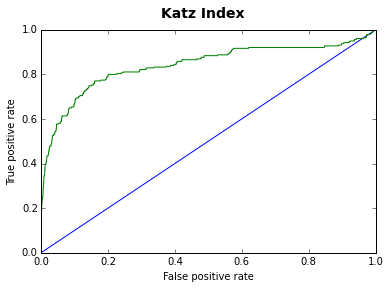

In [8]:
dyadScorePairs = katzIndex.runAll()
roc = linkprediction.ROCMetric(partitionedGraph[1], dyadScorePairs)
roc.generatePoints()
points = roc.getPoints()
plt.suptitle("Katz Index", fontsize=14, fontweight="bold")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.plot([0, 1], [0, 1])
plt.plot(points[0], points[1])

In [9]:
roc.areaUnderCurve()

0.8395599882765421

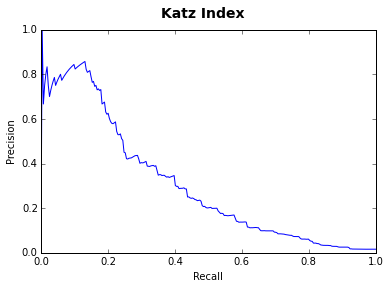

In [10]:
pr = linkprediction.PrecisionRecallMetric(partitionedGraph[1], dyadScorePairs)
pr.generatePoints()
points = pr.getPoints()
plt.suptitle("Katz Index", fontsize=14, fontweight="bold")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(points[0], points[1])

In [11]:
pr.areaUnderCurve()

0.30669238808049026

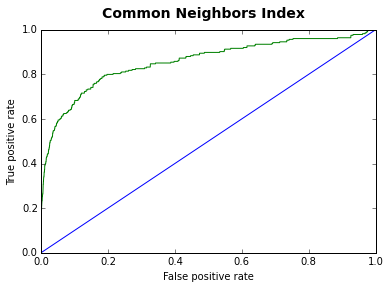

In [12]:
dyadScorePairs = commonNeighborsIndex.runAll()
roc = linkprediction.ROCMetric(partitionedGraph[1], dyadScorePairs)
roc.generatePoints()
points = roc.getPoints()
plt.suptitle("Common Neighbors Index", fontsize=14, fontweight="bold")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
plt.plot([0, 1], [0, 1])
plt.plot(points[0], points[1])

In [13]:
roc.areaUnderCurve()

0.8550255916476724

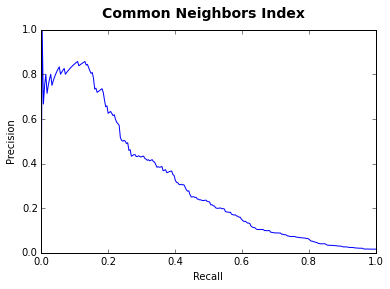

In [14]:
pr = linkprediction.PrecisionRecallMetric(partitionedGraph[1], dyadScorePairs)
pr.generatePoints()
points = pr.getPoints()
plt.suptitle("Common Neighbors Index", fontsize=14, fontweight="bold")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.plot(points[0], points[1])

In [15]:
pr.areaUnderCurve()

0.3178840557204412

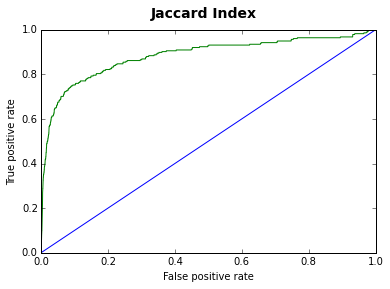

In [16]:
dyadScorePairs = jaccardIndex.runAll()
roc = linkprediction.ROCMetric(partitionedGraph[1], dyadScorePairs)
roc.generatePoints()
points = roc.getPoints()
plt.suptitle("Jaccard Index", fontsize=14, fontweight="bold")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
plt.plot([0, 1], [0, 1])
plt.plot(points[0], points[1])

In [17]:
roc.areaUnderCurve()

0.882069385090542

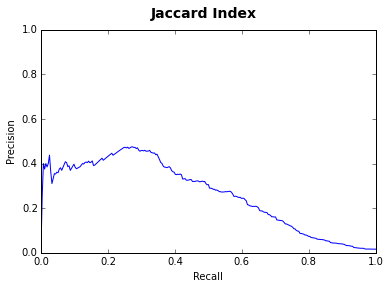

In [18]:
pr = linkprediction.PrecisionRecallMetric(partitionedGraph[1], dyadScorePairs)
pr.generatePoints()
points = pr.getPoints()
plt.suptitle("Jaccard Index", fontsize=14, fontweight="bold")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.plot(points[0], points[1])

In [19]:
pr.areaUnderCurve()

0.26378573185844834

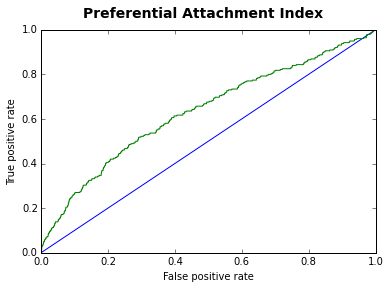

In [20]:
dyadScorePairs = preferentialAttachmentIndex.runAll()
roc = linkprediction.ROCMetric(partitionedGraph[1], dyadScorePairs)
roc.generatePoints()
points = roc.getPoints()
plt.suptitle("Preferential Attachment Index", fontsize=14, fontweight="bold")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
plt.plot([0, 1], [0, 1])
plt.plot(points[0], points[1])

In [21]:
roc.areaUnderCurve()

0.6324289920509638

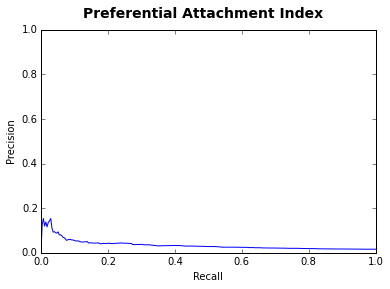

In [22]:
pr = linkprediction.PrecisionRecallMetric(partitionedGraph[1], dyadScorePairs)
pr.generatePoints()
points = pr.getPoints()
plt.suptitle("Preferential Attachment Index", fontsize=14, fontweight="bold")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.plot(points[0], points[1])

In [23]:
pr.areaUnderCurve()

0.03515829546435722

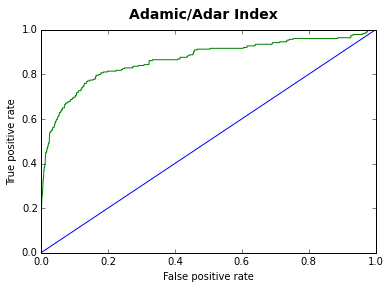

In [23]:
dyadScorePairs = adamicAdarIndex.runAll()
roc = linkprediction.ROCMetric(partitionedGraph[1], dyadScorePairs)
roc.generatePoints()
points = roc.getPoints()
plt.suptitle("Adamic/Adar Index", fontsize=14, fontweight="bold")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.axis([0, 1, 0, 1])
plt.plot([0, 1], [0, 1])
plt.plot(points[0], points[1])

In [24]:
roc.areaUnderCurve()

0.8653935513315537

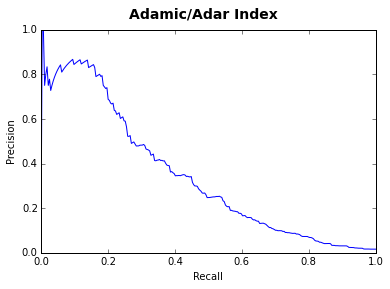

In [25]:
pr = linkprediction.PrecisionRecallMetric(partitionedGraph[1], dyadScorePairs)
pr.generatePoints()
points = pr.getPoints()
plt.suptitle("Adamic/Adar Index", fontsize=14, fontweight="bold")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.plot(points[0], points[1])

In [26]:
pr.areaUnderCurve()

0.34470943411244376

In [24]:
node = partitionedGraph[0].randomNode()
nodes = partitionedGraph[0].neighbors(node)

subGraph = graph.Subgraph().fromNodes(partitionedGraph[0], nodes)

In [25]:
LIST_LENGTH = len(nodes) - 1
a = []
color = {}
while len(a) < LIST_LENGTH:
    a.append(500)
for e in nodes:
    color[e] = len(nodes)
a.append(2000)
len(color)
color[list(color)[-1]] = len(nodes) / 2
color[list(color)[-2]] = len(nodes) / 3

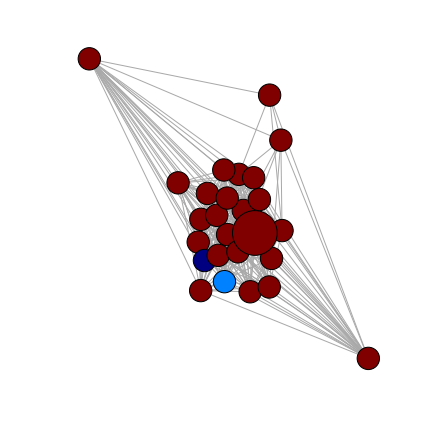

In [26]:
viztasks.drawGraph(subGraph, (7,7), False, a, None, color)

In [69]:
crossValidator = linkprediction.KFoldCrossValidator(G, cn, roc)
crossValidator.crossValidate(10)